In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
import os
for dirpath, dirname, filenames in os.walk('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'):
    print(dirpath)

/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases


In [3]:
#Constants 

batch_size = 32 
seed = 42 
img_height = 224 
img_width = 224 
AUTOTUNE = tf.data.AUTOTUNE # Automatically optimizes performance 
                            # Automatically adjusts the degree of parallelism based on available CPU and memory resources.

In [4]:
train_dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'

In [5]:
train_ds = image_dataset_from_directory(
    
    train_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size = (img_height,img_width),
    batch_size = batch_size

)

val_ds = image_dataset_from_directory(
    
    train_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height,img_width),
    batch_size = batch_size

)

Found 1097 files belonging to 3 classes.
Using 878 files for training.
Found 1097 files belonging to 3 classes.
Using 219 files for validation.


In [6]:
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['Bengin cases', 'Malignant cases', 'Normal cases']


In [7]:
for image , label in train_ds:
    print("Image is : \n ",image[0])
    print("Label is : \n ",label[0])
    break

Image is : 
  tf.Tensor(
[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]], shape=(224, 224, 3), dtype=float32)
Label is : 
  tf.Tensor(1, shape=(), dtype=int32)


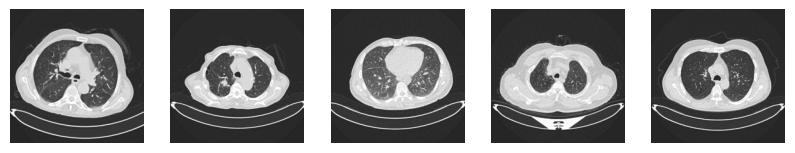

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Let's assume you already have 'train_ds' loaded

# Extracting one batch of images from the dataset
image_batch, label_batch = next(iter(train_ds))

# Number of random images to display
num_images = 5

# Plotting random images from the batch
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis('off')  # Hide axes
plt.show()

In [9]:
def preprocess(image,label): # for why we use image and label param see above code snippet 
    
    image = image / 255.0

    return image , label

In [10]:
# map will map all pre-processing steps to data 
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE )
val_ds = val_ds.map(preprocess, num_parallel_calls=AUTOTUNE ) 

In [11]:
for image , label in train_ds: # After Pre-Processing 
    print("Image is : \n ",image[0])
    print("Label is : \n ",label[0])
    break

Image is : 
  tf.Tensor(
[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.1490196

In [12]:
#  The cache operation stores data in memory (RAM) or on disk. 
# This step is CPU-bound because it involves reading data from the storage (disk) and 
# loading it into memory.

train_ds = train_ds.cache()
val_ds = val_ds.cache()

# The prefetch operation works by loading data asynchronously in the background 
# using CPU resources while the GPU is training. This allows the CPU to continue 
#loading the next batch of data while the GPU is processing the current batch.

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 512)         │           2,0

 Total params: 15,610,499 (59.55 MB)

 Trainable params: 15,604,099 (59.52 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [16]:
import tensorflow as tf

# Check if a GPU is available (Tensorflow on most cases automatically use GPU if its available on device )
# Some casese where Tensorflow version or packages version like CUDA, cuDNN if didn't match can cause issue 
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds, verbose=1)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 31s 625ms/step - accuracy: 0.3870 - loss: 2.4028 - val_accuracy: 0.0959 - val_loss: 1.1391
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6273 - loss: 1.1052 - val_accuracy: 0.0959 - val_loss: 1.1820
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6813 - loss: 0.8830 - val_accuracy: 0.0959 - val_loss: 1.1813
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.7341 - loss: 0.7080 - val_accuracy: 0.1918 - val_loss: 1.1233
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.7685 - loss: 0.5980 - val_accuracy: 0.4612 - val_loss: 1.0437
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8459 - loss: 0.3998 - val_accuracy: 0.4247 - val_loss: 1.0341
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8735 - loss: 0.3304 - val_accuracy: 0.4201 - val_loss: 1.0585
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8983 - loss: 0.2513 - val_accuracy: 0.4201 -

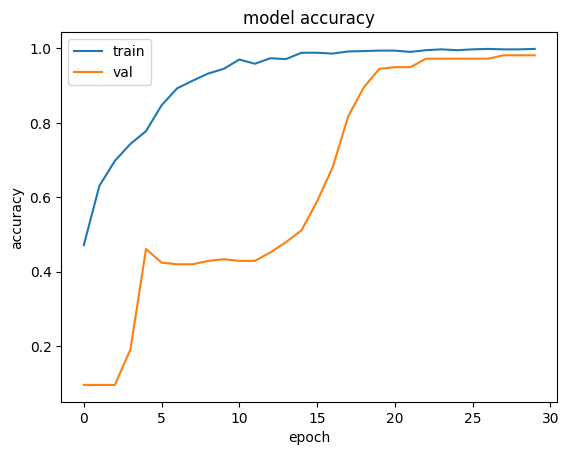

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

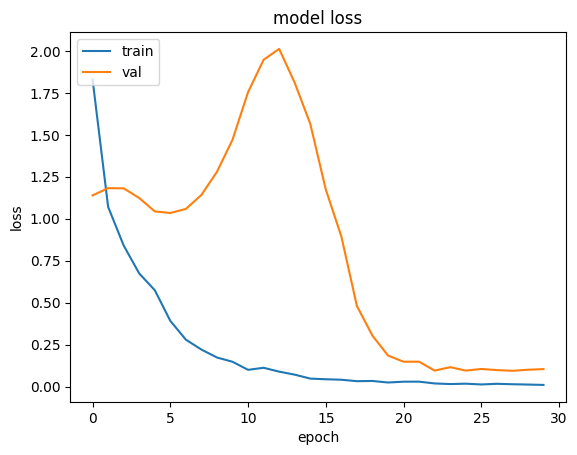

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()